In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import plotly.express as px
import pandas as pd
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import expand_dims


In [3]:
path_sudoku_train = '/content/drive/MyDrive/UNP seminarski/Sudoku cifre/train_data'
path_sudoku_test = '/content/drive/MyDrive/UNP seminarski/Sudoku cifre/test_data'
path_sudoku_validation = '/content/drive/MyDrive/UNP seminarski/Sudoku cifre/validation_data'


## Model 3.3 (vgg16 + augmentation)

In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [8]:
model = tf.keras.models.load_model('/content/drive/MyDrive/UNP seminarski/Sudoku cifre/model3_3.hdf5')

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predikcija_slike(image_path='photo.jpg'):

  image = load_img(image_path, target_size=(64, 64))
  image_array = img_to_array(image)

  image_array = image_array / 255.0
  input_data = np.expand_dims(image_array, axis=0)

  predictions = model.predict(input_data)

  predicted_class = np.argmax(predictions)

  print("Predviđena klasa:", predicted_class)

<IPython.core.display.Javascript object>

Saved to photo.jpg


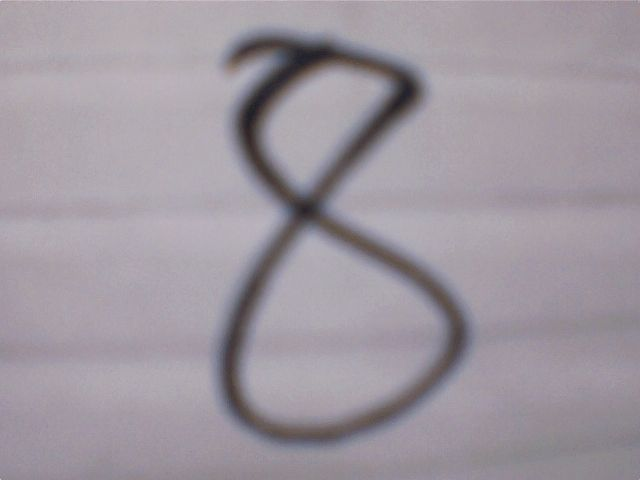


1/1 [==============================] - 0s 77ms/step
Predviđena klasa: 8


In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
  print()
  predikcija_slike(filename)
except Exception as err:
  print(str(err))